## TASK 5 - DATA VISUALIZATION AND ANALYSIS ON US ACCIDENTS DATASET

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import and view dataset

In [2]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [3]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.dtypes.value_counts()

object     20
bool       13
float64    12
int64       1
Name: count, dtype: int64

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
df.State.unique

<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
7728389    CA
7728390    CA
7728391    CA
7728392    CA
7728393    CA
Name: State, Length: 7728394, dtype: object>

## STATES WITH HIGHEST ACCIDENT COUNT

Text(0.5, 1.0, 'States with highest number of accidents')

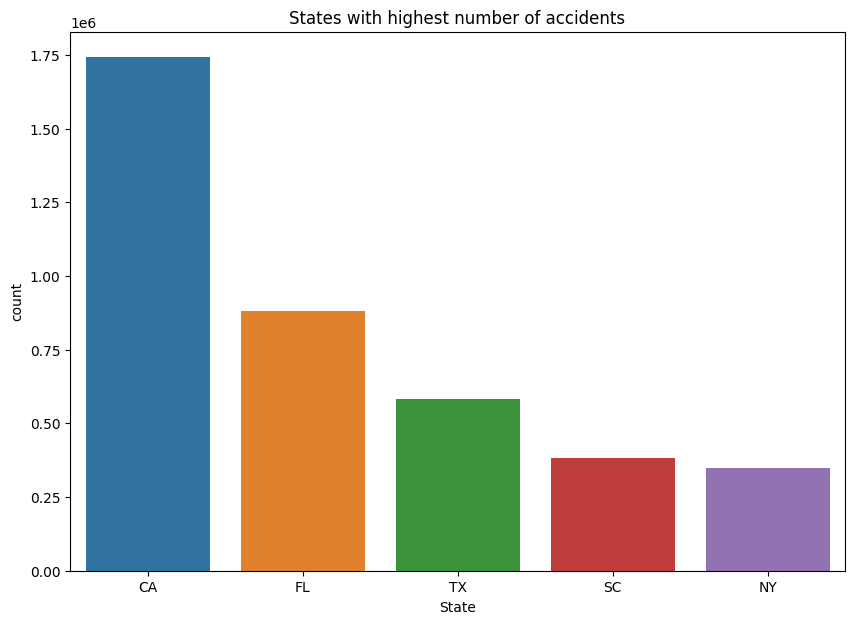

In [7]:
states = df.State.value_counts().head()
plt.figure(figsize=(10,7))
sns.barplot(y=states, x=states.index)
plt.title('States with highest number of accidents')


## CITIES WITH HIGHEST ACCIDENT COUNT

Text(0.5, 1.0, 'Cities with highest number of accidents')

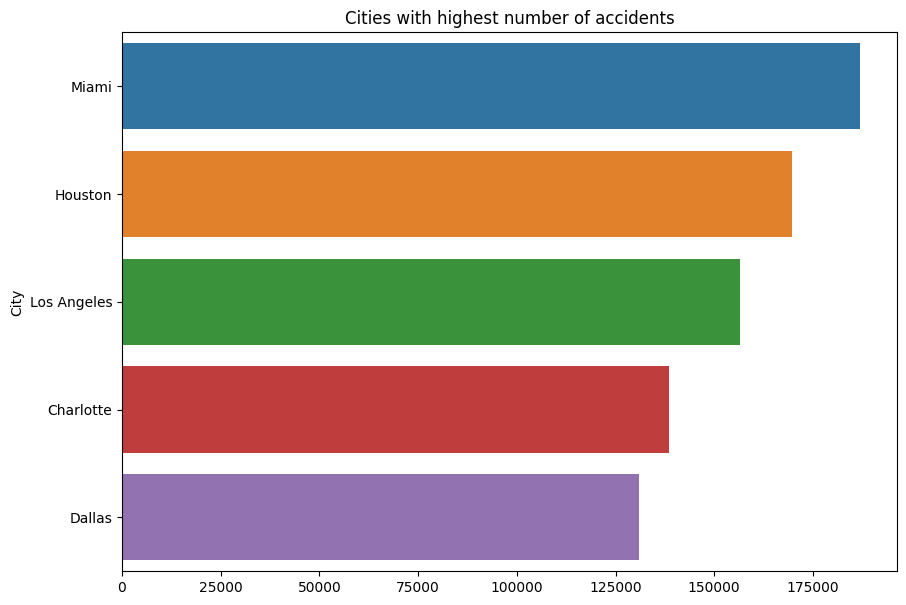

In [8]:
cities = df.City.value_counts().head()
plt.figure(figsize=(10, 7))
sns.barplot(x=cities.values, y=cities.index)
plt.title('Cities with highest number of accidents')

## VISUALIZING THE TRENDS OVER TIME

In [9]:
df.Start_Time = pd.to_datetime(df.Start_Time, errors='coerce')

Text(0.5, 1.0, 'Accidents over time')

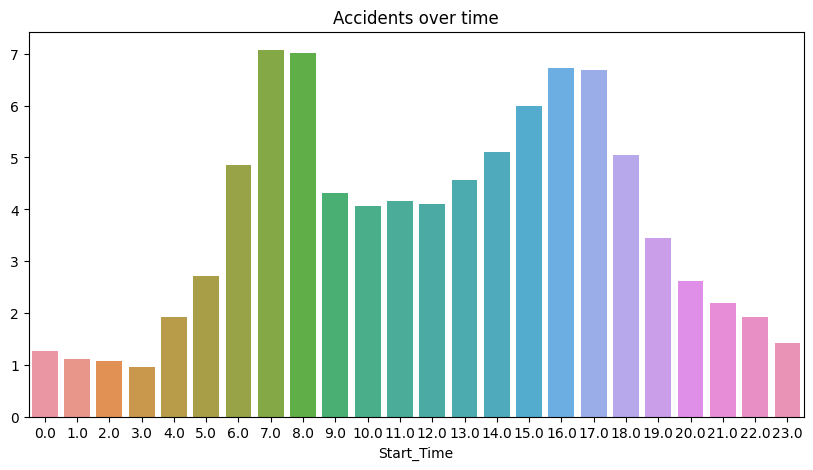

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Start_Time.dt.hour.value_counts().index, y=df.Start_Time.dt.hour.value_counts().values/len(df)*100)
plt.title('Accidents over time')

Text(0.5, 1.0, 'Accidents over days')

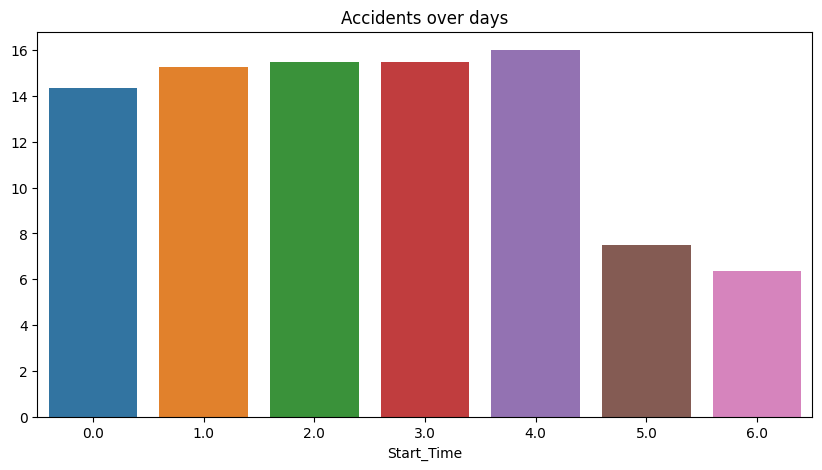

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.Start_Time.dt.day_of_week.value_counts().index, y=df.Start_Time.dt.day_of_week.value_counts().values/len(df)*100)
plt.title('Accidents over days')

In [12]:
weekends_data = df[(df['Start_Time'].dt.day_of_week == 5)|(df['Start_Time'].dt.day_of_week == 6)]

Text(0.5, 1.0, 'Accidents over time on weekends')

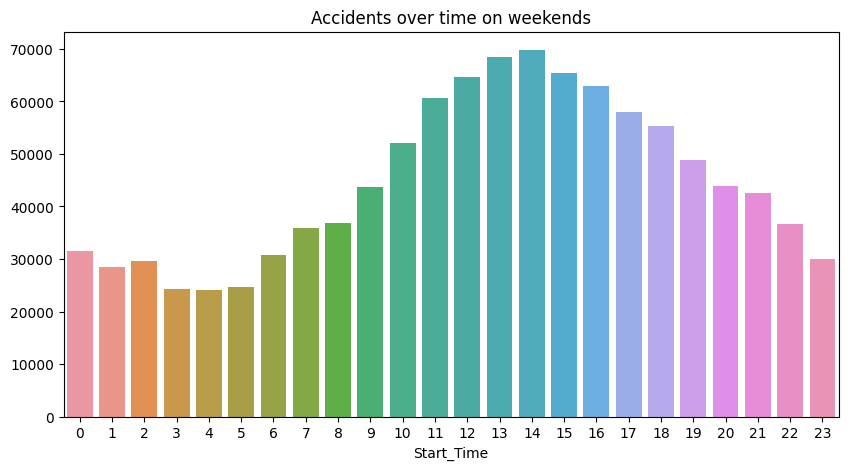

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x=weekends_data.Start_Time.dt.hour.value_counts().index, y=weekends_data.Start_Time.dt.hour.value_counts().values)
plt.title('Accidents over time on weekends')

Text(0.5, 1.0, 'Accidents by month')

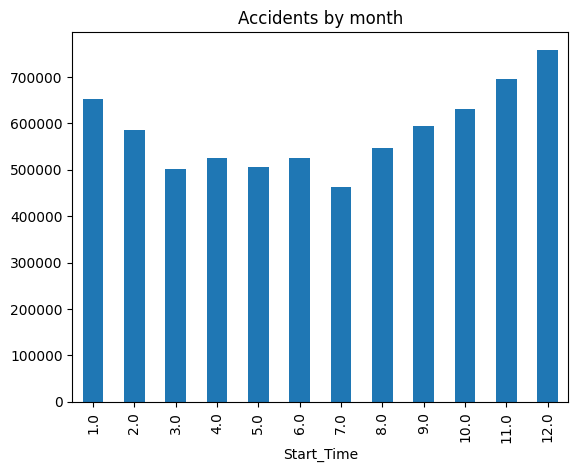

In [14]:
df.Start_Time.dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Accidents by month')

Text(0.5, 1.0, 'Accidents over the years')

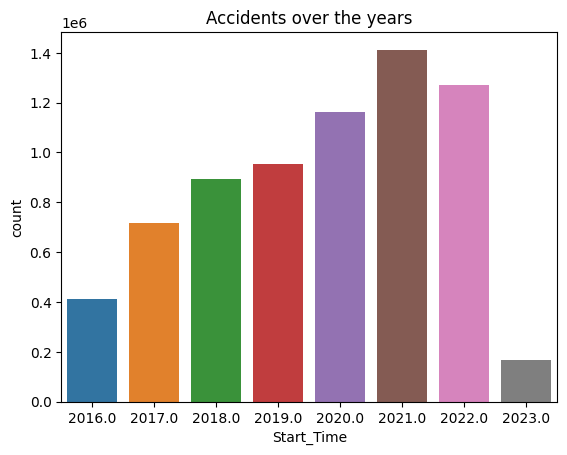

In [15]:
sns.countplot(x=df.Start_Time.dt.year, data=df)
plt.title('Accidents over the years')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


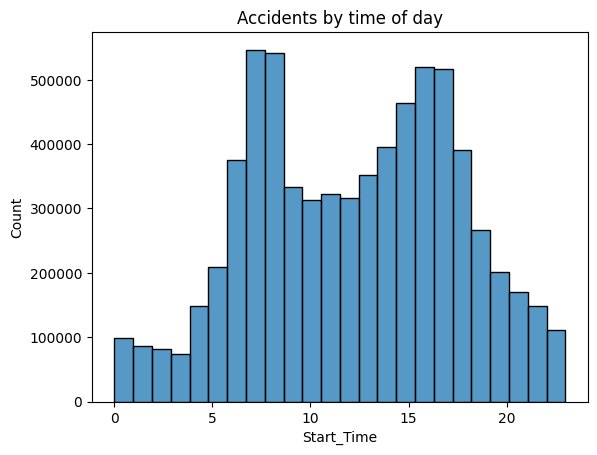

In [21]:
sns.histplot(df.Start_Time.dt.hour, bins=24)
plt.title('Accidents by time of day')
plt.show()

## SEVERITY OF THE ACCIDENTS

Text(0.5, 1.0, 'Accidents wrt Severity')

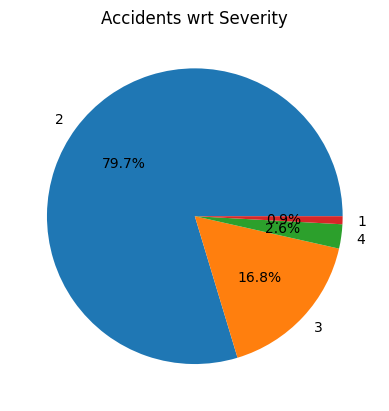

In [16]:
plt.pie(df.Severity.value_counts(), labels=df.Severity.value_counts().index, autopct='%1.1f%%')
plt.title('Accidents wrt Severity')

## BASED ON SOURCE OF ACCIDENT

<Axes: ylabel='count'>

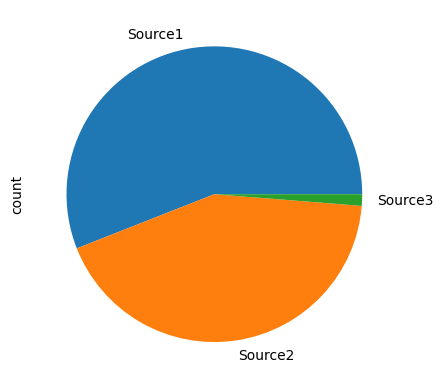

In [17]:
df.Source.value_counts().plot(kind='pie')

## RELATION BETWEEN ACCIDENTS AND THE WEATHER CONDITION

In [18]:
df.Weather_Condition.value_counts()

Weather_Condition
Fair                           2560802
Mostly Cloudy                  1016195
Cloudy                          817082
Clear                           808743
Partly Cloudy                   698972
                                ...   
Heavy Sleet / Windy                  1
Heavy Rain Shower / Windy            1
Heavy Freezing Rain / Windy          1
Heavy Smoke                          1
Dust Whirls                          1
Name: count, Length: 144, dtype: int64

Text(0.5, 1.0, 'Weather Conditions during Accidents')

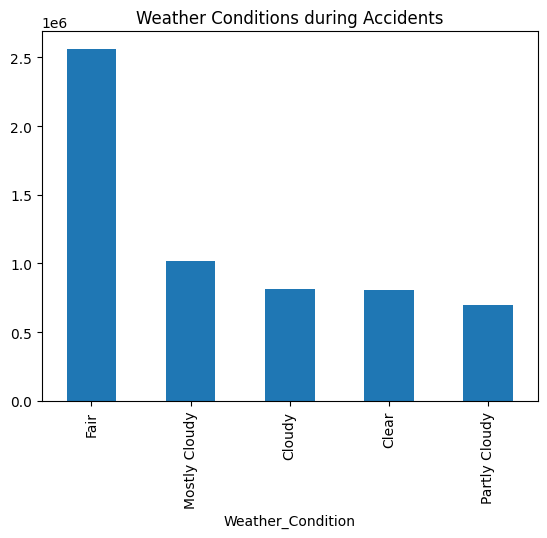

In [19]:
df.Weather_Condition.value_counts().head().plot(kind='bar')
plt.title('Weather Conditions during Accidents')

## VISUALISING NUMERICAL VALUES IN THE DATASET

In [23]:
df_num = df.select_dtypes(np.number)

In [24]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

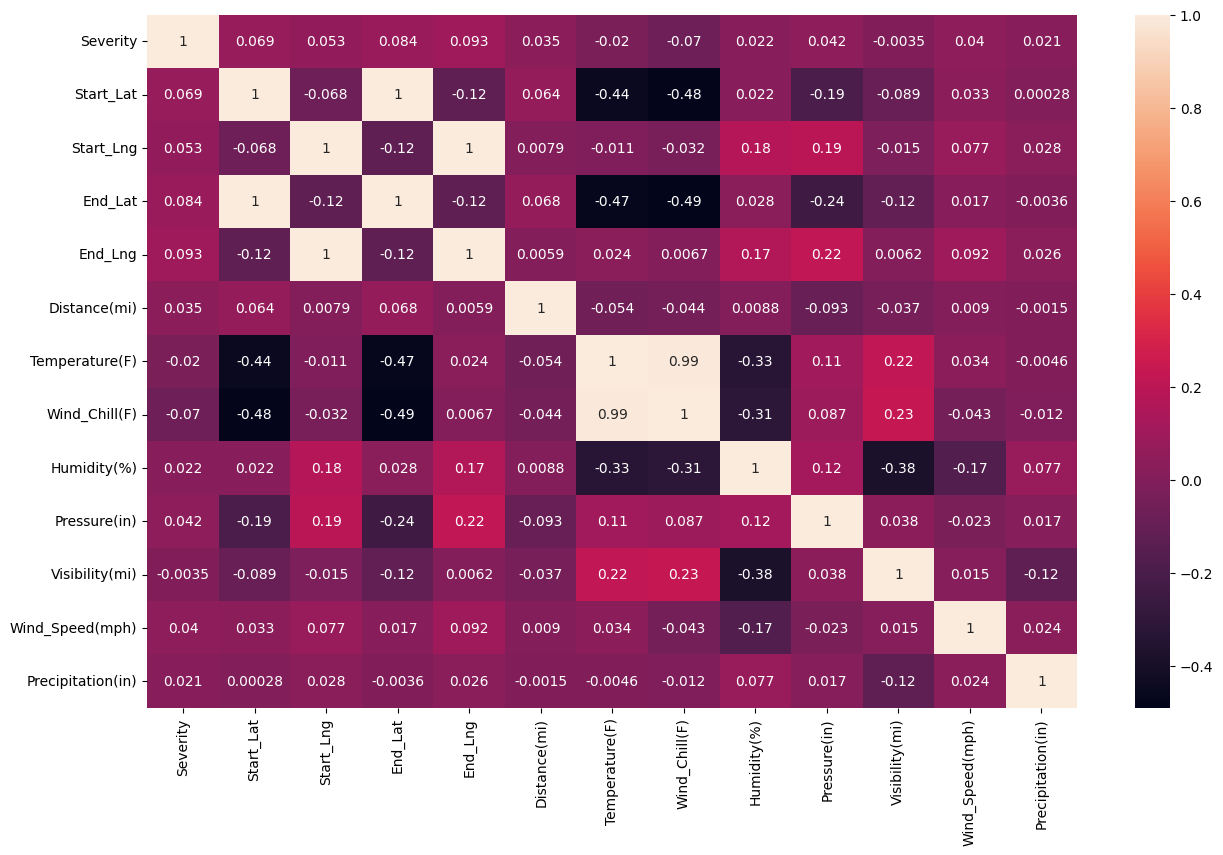

In [25]:
plt.figure(figsize=(15,9))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

## VISUALISING THE LOCATION OF ACCIDENT USING LATITUDES AND LONGITUDES

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


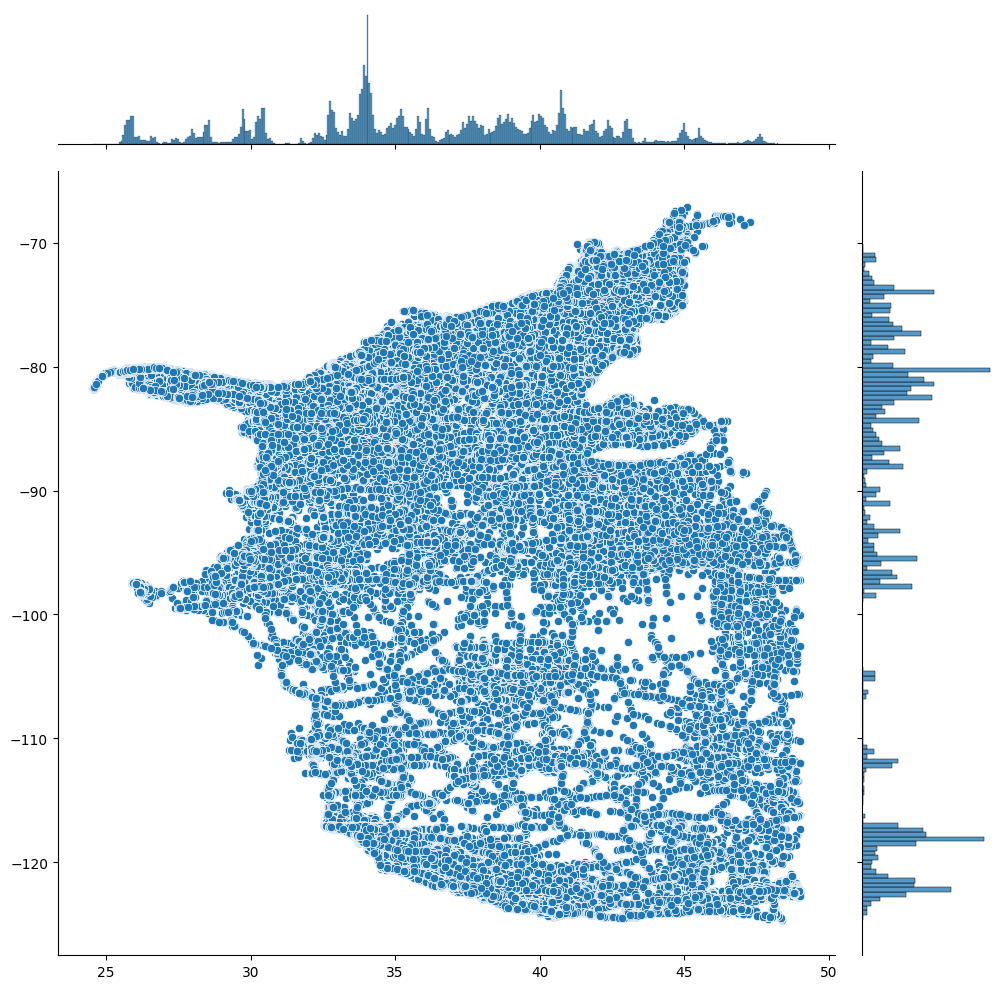

In [26]:
sns.jointplot(x=df_num.Start_Lat.values, y=df_num.Start_Lng.values, height=10)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


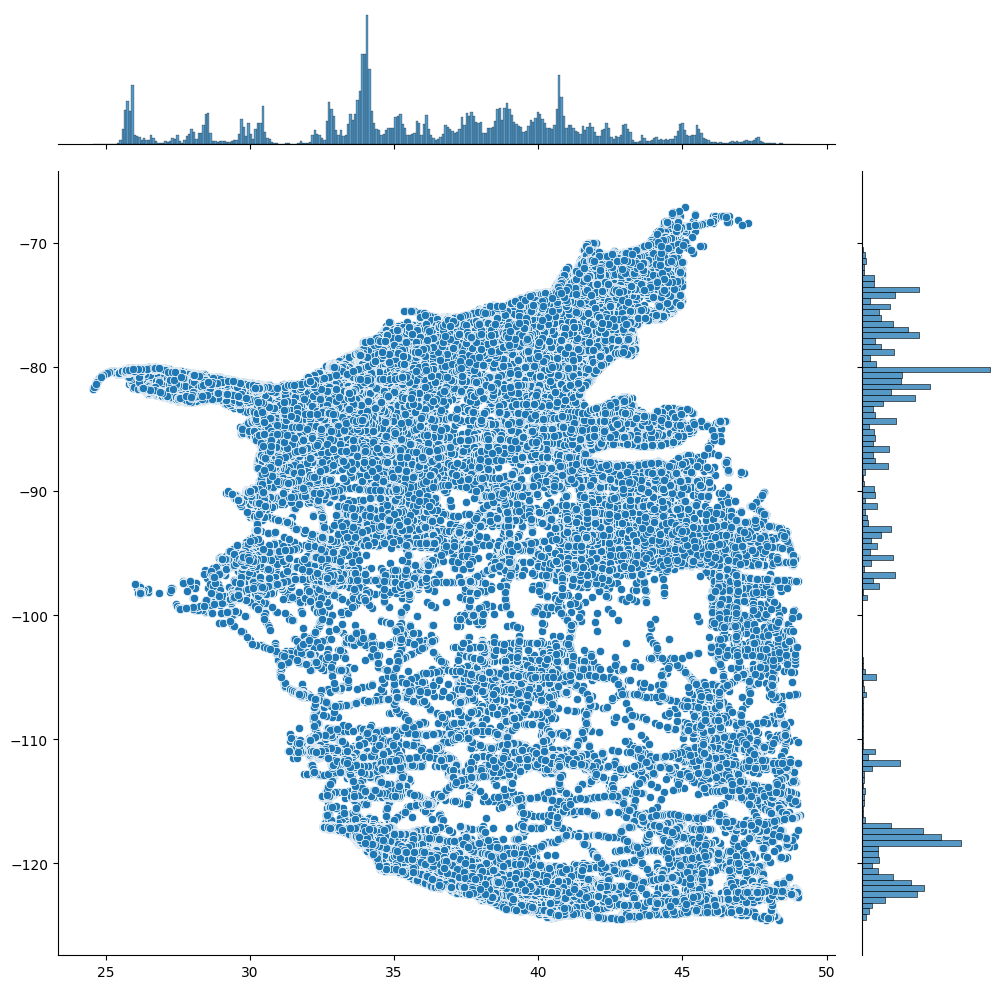

In [27]:
sns.jointplot(x=df_num.End_Lat.values, y=df_num.End_Lng.values, height=10)
plt.show()